**Importing Libraries**

In [34]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix , precision_score, recall_score,f1_score

**Loading the Data**

In [2]:
path = "C:\\Users\\Javeria Rizwan\\Downloads\\creditcarddataset.csv"
card_df=pd.read_csv(path)

**Exploration EDA**

In [3]:
card_df.head() #return top 5 rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
card_df.shape #gives all attributes of dataset

(284807, 31)

**Dataset Pre-Processing**

In [5]:
# checking the number of missing values in each column
card_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
#Check for missing values
card_df.isnull().values.any() 

False

In [7]:
#dataset informations
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
# distribution of legit transactions & fraudulent transactions
card_df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [9]:
#performing statistical operations
card_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
#legit and fraud transactions
legit = card_df[card_df.Class==0]
fraud = card_df[card_df['Class']==1]

In [11]:
legit.head().value_counts()

Time  V1         V2         V3        V4         V5         V6         V7         V8         V9         V10        V11        V12        V13        V14        V15        V16        V17        V18        V19        V20        V21        V22        V23        V24        V25        V26        V27        V28        Amount  Class
0.0   -1.359807  -0.072781  2.536347   1.378155  -0.338321   0.462388   0.239599   0.098698   0.363787   0.090794  -0.551600  -0.617801  -0.991390  -0.311169   1.468177  -0.470401   0.207971   0.025791   0.403993   0.251412  -0.018307   0.277838  -0.110474   0.066928   0.128539  -0.189115   0.133558  -0.021053  149.62  0        1
       1.191857   0.266151  0.166480   0.448154   0.060018  -0.082361  -0.078803   0.085102  -0.255425  -0.166974   1.612727   1.065235   0.489095  -0.143772   0.635558   0.463917  -0.114805  -0.183361  -0.145783  -0.069083  -0.225775  -0.638672   0.101288  -0.339846   0.167170   0.125895  -0.008983   0.014724  2.69    0        1
1.0   -1.

In [12]:
legit.shape

(284315, 31)

In [13]:
#fraud.head().value_counts()

In [14]:
fraud.shape

(492, 31)

**Creating New Dataframe**


In [15]:
legit_sample = legit.sample(n=432) 
new_df= pd.concat([legit_sample,fraud], axis =0)


In [16]:
new_df.shape

(924, 31)

In [17]:
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
244824,152503.0,1.702850,-0.853673,-0.337609,1.615325,-0.732697,0.452196,-0.693022,0.260149,1.548250,...,0.322770,1.114394,-0.178444,-0.312879,0.227160,-0.295679,0.043195,-0.038007,109.00,0
46232,42693.0,-0.690206,0.725310,1.431099,-1.427873,0.108901,-0.912890,0.847438,-0.410910,0.891606,...,-0.308436,-0.356808,-0.077371,0.044927,-0.160419,0.701390,0.060380,-0.245583,8.00,0
195894,131267.0,-2.037000,1.807437,-1.059712,-2.796369,0.047734,-0.658336,-0.026489,1.398435,-0.088236,...,-0.223115,-0.982700,0.013465,0.054319,0.114068,0.377217,0.044601,0.084821,1.00,0
81942,59169.0,-2.430510,1.763634,-0.117676,-2.003191,-0.679145,-0.987866,-0.066427,-1.727428,0.420085,...,1.521796,0.208575,0.141128,0.382563,0.183484,-0.284768,1.174193,0.839841,20.00,0
101464,67842.0,0.449972,-1.244095,-0.653498,0.241368,-0.495036,-0.714179,0.844531,-0.276589,-0.360698,...,-0.093508,-1.349629,-0.282368,0.044321,0.050834,0.662051,-0.196394,0.061176,442.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [18]:
new_df['Class'].value_counts()

Class
1    492
0    432
Name: count, dtype: int64

In [19]:
# compare the values for both transactions
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,92367.925926,0.072956,0.090473,0.014060,0.000137,0.015749,-0.063524,0.019031,-0.006081,-0.027556,...,-0.010853,0.029273,-0.106003,0.004804,-0.003073,0.006266,0.034711,0.004244,0.004978,77.989468
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


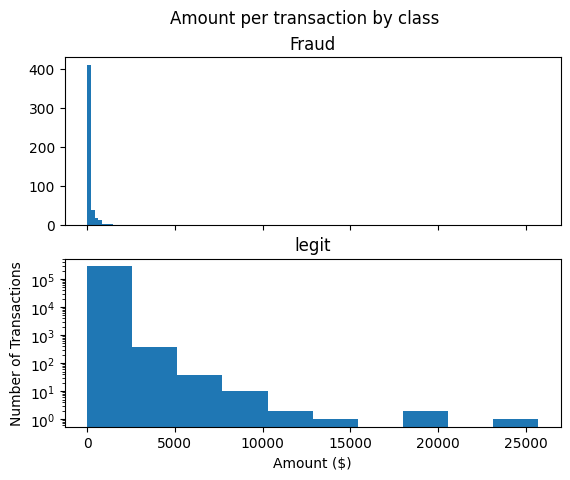

In [20]:
#Graphical Representation
f, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
f.suptitle('Amount per transaction by class')



ax1.hist(fraud.Amount)
ax1.set_title('Fraud')

ax2.hist(legit.Amount)
ax2.set_title('legit')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')

plt.yscale('log')
plt.show()

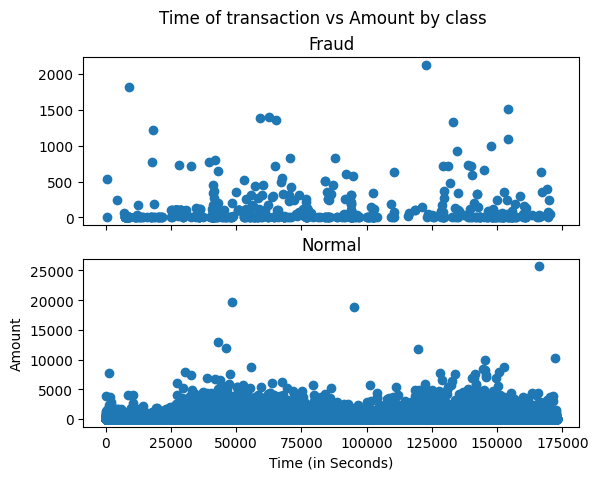

In [21]:
f, (ax1, ax2) = plt.subplots(2, 1,sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(legit.Time, legit.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

**Preparing the Dataset**

In [22]:
credit_df = new_df.drop(['Time'], axis=1)

credit_df['Amount'] = StandardScaler().fit_transform(credit_df['Amount'].values.reshape(-1, 1))

In [23]:
X = credit_df.drop('Class', axis=1)
Y = credit_df['Class']


**Splitting the dataset**

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

**Implementing ML Models**


**Logistic Regression**

In [25]:
model = LogisticRegression(max_iter=1000)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(solver='liblinear')

**Evaluation on Training Data**

In [26]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.959404600811908


**Evaluation on Testing Data**

In [27]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9297297297297298


**Random Forest**

In [28]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100)

**Training Classifier**

In [29]:
# Train the classifier
rf_classifier.fit(X_train, Y_train)
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)


**Evaluation on Test Data**

In [30]:
# Evaluate the performance of the classifier
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        86
           1       0.97      0.89      0.93        99

    accuracy                           0.92       185
   macro avg       0.93      0.93      0.92       185
weighted avg       0.93      0.92      0.92       185



**Evaluation measures**

**Confusion Matrix**

In [31]:
# Calculate the confusion matrix
confusion_matrix= confusion_matrix(Y_test, y_pred)



In [32]:
print(confusion_matrix)

[[83  3]
 [11 88]]


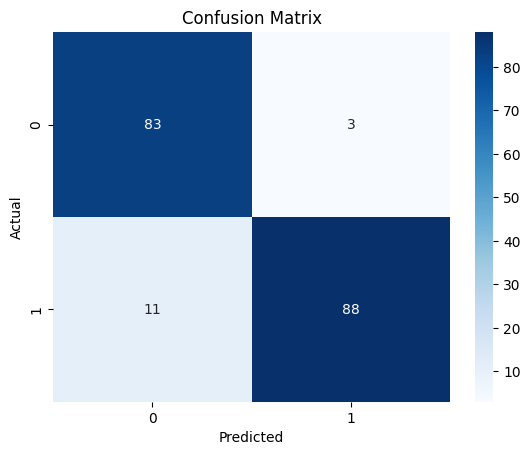

In [33]:
# Create a heatmap for the confusion matrix
plt.figure()
sns.heatmap(confusion_matrix,  annot=True, fmt='d',cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

**Precision**

0.967032967032967


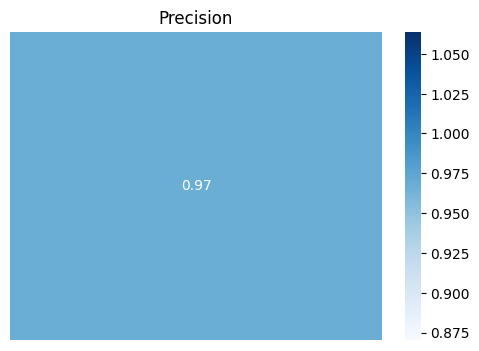

In [41]:
# Calculate precision and recall
precision = precision_score(Y_test, y_pred)
print(precision)
# Create heatmap for precision
plt.figure(figsize=(6, 4))
sns.heatmap(np.array([[precision]]), annot=True, cmap='Blues')
plt.title('Precision')
plt.xticks([])
plt.yticks([])
plt.show()


**Recall**

0.8888888888888888


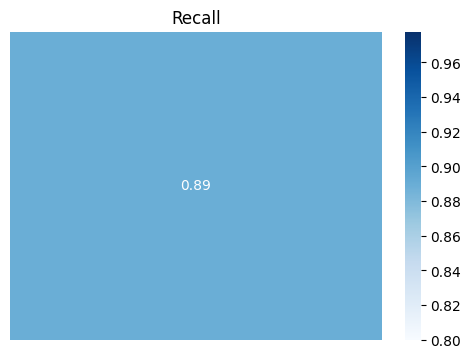

In [40]:
recall = recall_score(Y_test, y_pred)
print(recall)
# Create heatmap for recall
plt.figure(figsize=(6, 4))
sns.heatmap(np.array([[recall]]), annot=True, cmap='Blues')
plt.title('Recall')
plt.xticks([])
plt.yticks([])
plt.show()

**F1 - Score**

0.9263157894736842


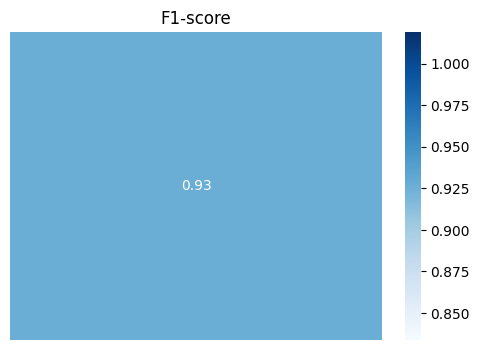

In [42]:
# Calculate F1-score
f1 = f1_score(Y_test, y_pred)
print(f1)
# Create heatmap for F1-score
plt.figure(figsize=(6, 4))
sns.heatmap(np.array([[f1]]), annot=True, cmap='Blues')
plt.title('F1-score')
plt.xticks([])
plt.yticks([])
plt.show()